In [20]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
import mglearn
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

In [21]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)


In [22]:
image_shape = people.images[0].shape

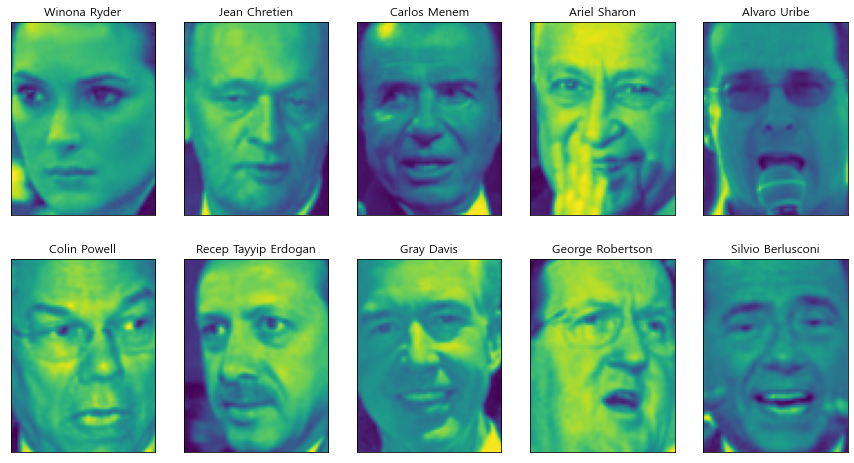

In [23]:
fig, axes = plt.subplots(2,5, figsize=(15,8),
                         subplot_kw={"xticks":(),"yticks":()})
fig.patch.set_facecolor('w')

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [24]:
people.images.shape, len(people.target_names)

((3023, 87, 65), 62)

In [25]:
mask = np.zeros(people.target.shape, dtype=bool)

for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]] = 1
    
x_people = people.data[mask]
y_people = people.target[mask]

# 0~255 픽셀값을 0~1로 조정
x_people = x_people / 255

In [26]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(x_people,
                                                    y_people, stratify=y_people,
                                                    random_state=0)

In [27]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
knn.score(X_test, y_test)

0.2189922480620155

In [29]:
pca = PCA(n_components=50, whiten=True, random_state=0)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [30]:
X_train_pca.shape

(1547, 50)

In [31]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train)
knn.score(X_test_pca, y_test)

0.26356589147286824

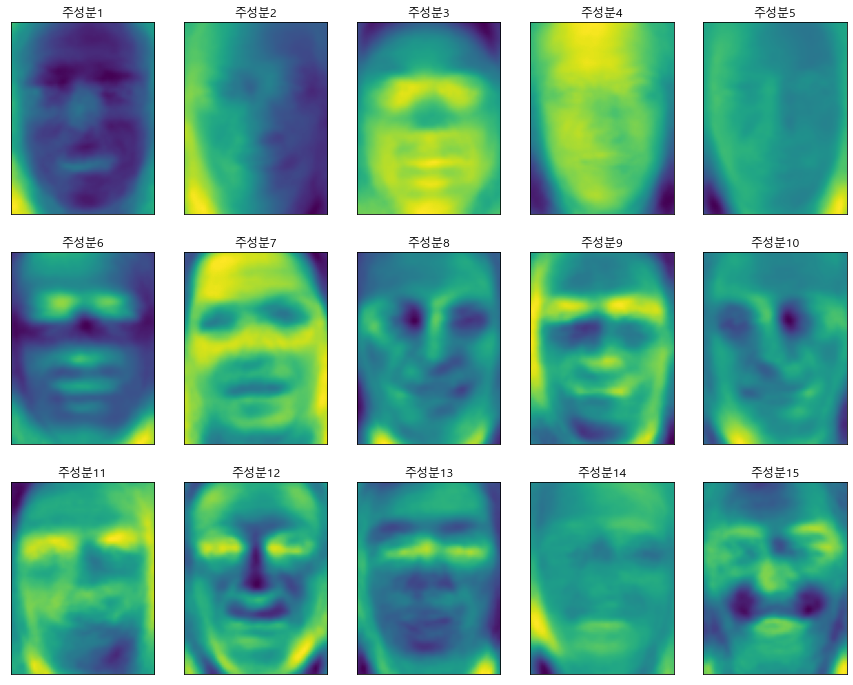

In [32]:
fig, axes = plt.subplots(3, 5, figsize=(15,12),
                         subplot_kw={"xticks" : (), "yticks" : ()})
fig.patch.set_facecolor('w')
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap="viridis")
    ax.set_title("주성분{}".format((i+1)))